## Played with SARIMA, pmdarima, and fb prophet libraries. For true and accurate prediction, look at Testing Prophet with Multiplicity

In [2]:
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns
import pandas as pd
from scipy.stats import norm, kde, kstest, stats
from numpy import inf
import itertools
%matplotlib inline
import warnings




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\cbt.csv"
fa = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [ ]:
fa['day'] = pd.to_datetime(fa['day'])
fa['day']= fa.day.dt.date
fa.set_index('day', inplace=True)
fa.index.freq = 'D'

In [ ]:
# noo fa = fa1[['time', 'emails_received']].copy()
#fa['time'] = pd.to_datetime(fa['time'], utc = True)
#fa['time']= fa.time.dt.date
#fa.set_index('time', inplace=True)

In [ ]:
fa.size

In [ ]:
fa.index.freq = 'D'

In [ ]:
fa

In [ ]:
train, test = fa.iloc[:1268], fa.iloc[1268:]
train = train.asfreq('D')
test = test.asfreq('D')

In [ ]:
def find_best_sarima(train, eval_metric):
    
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    counter = 0
    myDict = {}
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                counter += 1
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                myDict[counter] = [results.aic, results.bic, param, param_seasonal]

            except:
                continue
                
    dict_to_df = pd.DataFrame.from_dict(myDict,orient='index')
    
    if eval_metric == 'aic':
        best_run = dict_to_df[dict_to_df[0] == dict_to_df[0].min()].index.values
        best_run = best_run[0]
    elif eval_metric == 'bic':
        best_run = dict_to_df[dict_to_df[1] == dict_to_df[1].min()].index.values
        best_run = best_run[0]
            
    model = sm.tsa.statespace.SARIMAX(train,
                                      order=myDict[best_run][2],
                                      seasonal_order=myDict[best_run][3],
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()
    
    best_model = {'model':model, 
                  'aic':model.aic,
                  'bic':model.bic,
                  'order':myDict[best_run][2], 
                  'seasonal_order':myDict[best_run][3]}
    
    return best_model

In [ ]:
#best = find_best_sarima(train, 'bic')
best = sm.tsa.statespace.SARIMAX(train, order=(1,1,1),seasonal_order=(2,0,0,365))



In [ ]:
best = best.fit()

In [ ]:
best

In [ ]:
test['emails_received'].index[0]

In [ ]:
#import datetime as dt
test['emails_received'].index[-1]

In [ ]:
#pred= best['model'].predict(start= test.index[0] ,end = test.index[-1])
pred= best.predict(end = test.index[-1])

In [ ]:
pred

In [ ]:
pred.plot()

In [ ]:

plt.figure(figsize=(22, 10))
plt.plot(train.index, train, label='Train')
plt.plot(pred.index, pred, label='SARIMA', color='r')
plt.plot(test.index, test, label='Test', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()

In [ ]:
from matplotlib import pyplot
pyplot.plot(test)
#pyplot.plot(pred.index, color='red')

In [ ]:
pyplot.plot(pred)

In [ ]:
pyplot.plot(test.values)

In [ ]:
from matplotlib import pyplot
pyplot.plot(fa)
pyplot.plot(predictions, color='red')
plt.figure(figsize=(200,10))
pyplot.show()

In [ ]:
from pmdarima.arima import auto_arima

In [41]:
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

NameError: name 'auto_arima' is not defined

In [ ]:
train = train.fillna(0)

In [ ]:
fa.size

In [ ]:
stepwise_model.summary()

In [ ]:
pred= stepwise_model.predict()

In [ ]:
plt.plot(pred)

In [ ]:
plt.plot(test)

In [3]:
from fbprophet import Prophet

In [38]:
fa['day'] = pd.to_datetime(fa['day'])
fa['day']= fa.day.dt.date
fa.index.freq = 'D'

In [39]:
df_new = fa.rename(columns={"day": "ds", "emails_received": "y"})

In [44]:
m = Prophet(daily_seasonality=True)
m.fit(df_new)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
e = m.predict(future)

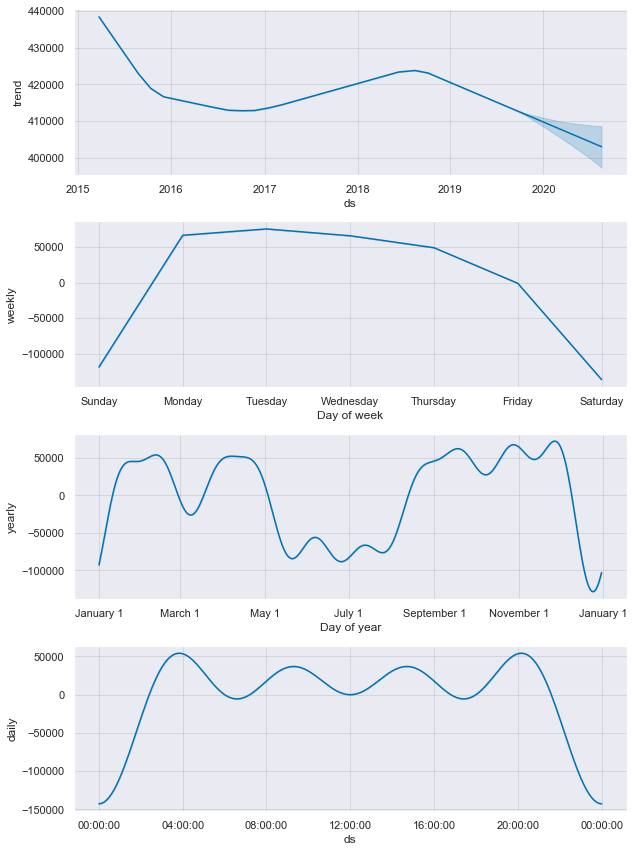

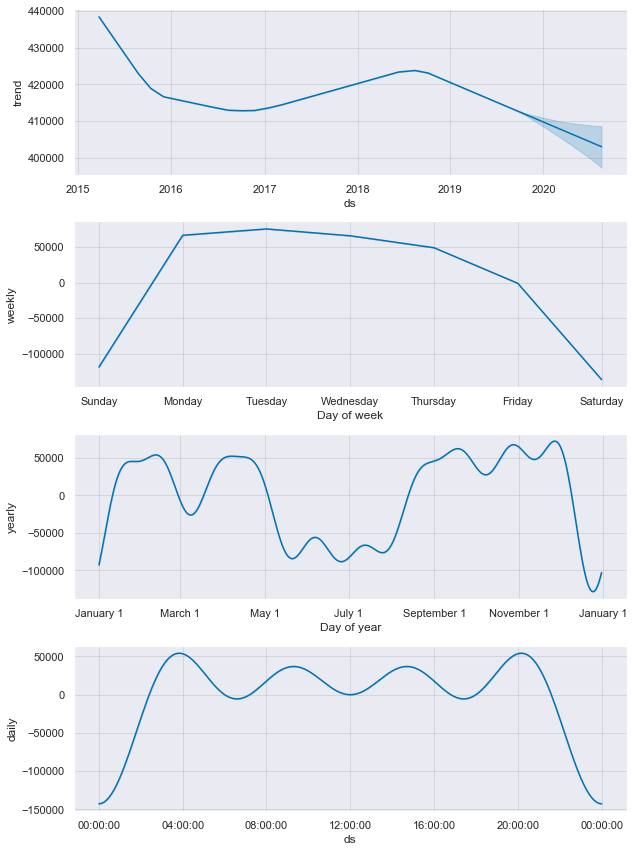

In [45]:
m.plot_components(e)

In [47]:
e


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-03-23,438406.526609,296896.571465,474475.712894,438406.526609,438406.526609,-54705.126673,-54705.126673,-54705.126673,-142785.336148,...,66387.391997,66387.391997,66387.391997,21692.817478,21692.817478,21692.817478,0.0,0.0,0.0,383701.399936
1,2015-03-24,438305.945521,311269.681284,482836.258204,438305.945521,438305.945521,-41453.465318,-41453.465318,-41453.465318,-142785.336148,...,75304.233862,75304.233862,75304.233862,26027.636969,26027.636969,26027.636969,0.0,0.0,0.0,396852.480204
2,2015-03-25,438205.364434,304118.388760,480141.339869,438205.364434,438205.364434,-47027.396580,-47027.396580,-47027.396580,-142785.336148,...,65661.259932,65661.259932,65661.259932,30096.679636,30096.679636,30096.679636,0.0,0.0,0.0,391177.967853
3,2015-03-26,438104.783346,293095.810854,461692.494234,438104.783346,438104.783346,-60029.996091,-60029.996091,-60029.996091,-142785.336148,...,48901.328575,48901.328575,48901.328575,33854.011483,33854.011483,33854.011483,0.0,0.0,0.0,378074.787255
4,2015-03-27,438004.202258,248467.908636,416326.981985,438004.202258,438004.202258,-106623.460448,-106623.460448,-106623.460448,-142785.336148,...,-1102.842713,-1102.842713,-1102.842713,37264.718414,37264.718414,37264.718414,0.0,0.0,0.0,331380.741810
5,2015-03-28,437903.621170,109265.885072,279181.603359,437903.621170,437903.621170,-238848.800261,-238848.800261,-238848.800261,-142785.336148,...,-136368.713671,-136368.713671,-136368.713671,40305.249558,40305.249558,40305.249558,0.0,0.0,0.0,199054.820909
6,2015-03-29,437803.040082,139698.582890,305147.772274,437803.040082,437803.040082,-218604.597022,-218604.597022,-218604.597022,-142785.336148,...,-118782.657982,-118782.657982,-118782.657982,42963.397108,42963.397108,42963.397108,0.0,0.0,0.0,219198.443060
7,2015-03-30,437702.458994,326704.445076,488986.406897,437702.458994,437702.458994,-31160.024062,-31160.024062,-31160.024062,-142785.336148,...,66387.391997,66387.391997,66387.391997,45237.920089,45237.920089,45237.920089,0.0,0.0,0.0,406542.434933
8,2015-03-31,437601.877907,333765.584881,500834.177988,437601.877907,437601.877907,-20343.271847,-20343.271847,-20343.271847,-142785.336148,...,75304.233862,75304.233862,75304.233862,47137.830440,47137.830440,47137.830440,0.0,0.0,0.0,417258.606060
9,2015-04-01,437501.296819,327880.775873,495213.682246,437501.296819,437501.296819,-28442.706165,-28442.706165,-28442.706165,-142785.336148,...,65661.259932,65661.259932,65661.259932,48681.370051,48681.370051,48681.370051,0.0,0.0,0.0,409058.590654


In [4]:
e['yhat']

NameError: name 'e' is not defined